# Exchange Rates during Significant Events
### By: Esha Sali, Prathamesh Saraf, Raman Ebrahimi Kalachayeh, Venz Burgos, Yingxiao Dai

### Abstract: 
Our project covers many specific events and their effect on exchange rates and the market. We attempt to analyze how major events can sway the market triggering investor panic, uncertainty, and patterns in the market. We cover major events such as Flash Crash of 2015, Brexit Era, Covid-19, General Anomalies, and the relative growth of countries with respect to the Euro.

### Helpful Datasets:
> [US Treasury](https://fiscaldata.treasury.gov/datasets/treasury-reporting-rates-exchange/treasury-reporting-rates-of-exchange)

> [Investing.com](https://www.investing.com/currencies/eur-usd-historical-data)

> [Datahub (Monthly Data)](https://datahub.io/core/exchange-rates#data)

> [Datahub (Daily Data)](https://datahub.io/core/exchange-rates#data)

> [EUR/USD in minutes](https://www.histdata.com/download-free-forex-historical-data/?/metatrader/1-minute-bar-quotes/EURUSD)

> [Kaggle (Daily EUR/USD)](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020/)

## Findings:

#### Brexit Era:
> During the Brexit Era we found that, at a macro perspective that EURO/POUND is worthy of attention. EURO strengthened compared to the POUND because during this time, there was uncertainity in the market, which based on the data, can be asserted that people were looking for safe-haven, which the EURO is stable, increased its strength compared to other currencies. These uncertain times of large political changes led to currency movements increasing volatility.
#### 2015 Flash Crash:
> During Flash Crash we found that a peg was removed by the Swiss National Bank holding the Swiss franc to the euro at 1.2. After its peak in 2007, there was a decline driven by the Great Recession. The 2008 Great Recession impacted Swiss exports as the euro's purchasing power hit a historic low against the Swiss franc. With Swiss exports making up 70% of the GDP, the Swiss National Bank intervened on September 6, 2011, by pegging the CHF to the EUR at 1.2000, aiming to artificially devalue the franc and boost trade with Eurozone partners. Despite not initially planning to remove the peg, the Swiss National Bank took this step in 2015 due to the substantial efforts required to sustain the peg, especially as the euro continued to depreciate. The abrupt removal caused the euro's value to plummet from 1.2 to 0.8 within a minute.
#### Covid 19:
> During Covid-19 we found that the dollar weakened. What explains it? We found through research that Investor Panic, Shutdown, and Lower Interest Rates contributed to this. During the time of covid, in particular 2020, we found that it didn't have a lasting effect on volatility. In fact, through the data analytics we found that volatility was only drastically affected for March 2020, specifically the time when the covid lockdown was announced. In an attempt to boost economic activity and recover, interest rates were lowered. We found that interest rates have an inverse relation with strength of a currency. Lower interest rates, are unattractive to foreign investors. Hence the dollar weakening during covid era.
#### Anomalies:
> Some Anomalies we found were the strengthening of the EURO compared to Indian currency even when Indian GDP was increasing. Similar with Russia. In India, heavy reliance on oil, 14 billion outflow and account deficit put downward pressure on the rupee. We found that a strong economy doesn't neccessarily correlate with a strong currency, as other global economic factors affect currency strength. Similar to the rupee, Russia has high import and declining foreign trade, contributing to it weakening compared to the Euro. As well as shrinking oil and gas export the ruble declined.


## Visualization and Graphs:

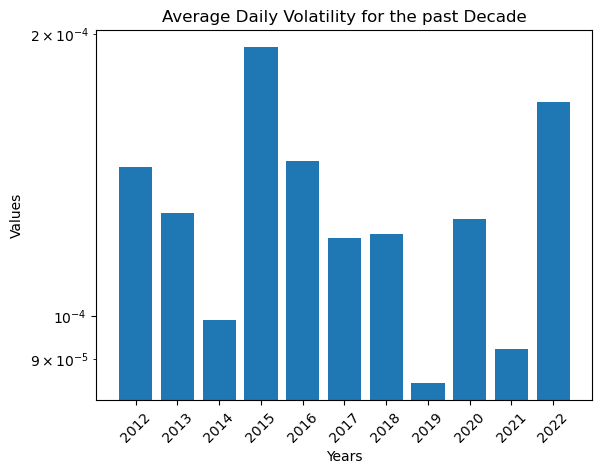

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for logarithmic operations

dataArr = {}

for x in range(12, 23):
    data = pd.read_csv(f'../Downloaded Database/E2U(MinuteData20{x}).csv', header=None,
                       names=['date', 'time', 'open', 'high', 'low', 'close', 'volume'])

    data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

    data.set_index('datetime', inplace=True)

    # Calculate logarithmic returns
    data['log_returns'] = np.log(data['close'] / data['close'].shift(1))

    daily_volatility = data['log_returns'].resample('D').std()

    average_daily_volatility = daily_volatility.mean()

    dataArr[f'20{x}'] = average_daily_volatility

years = list(dataArr.keys())
values = list(dataArr.values())

plt.bar(years, values)
plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Average Daily Volatility for the past Decade')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yscale('log')
plt.show()

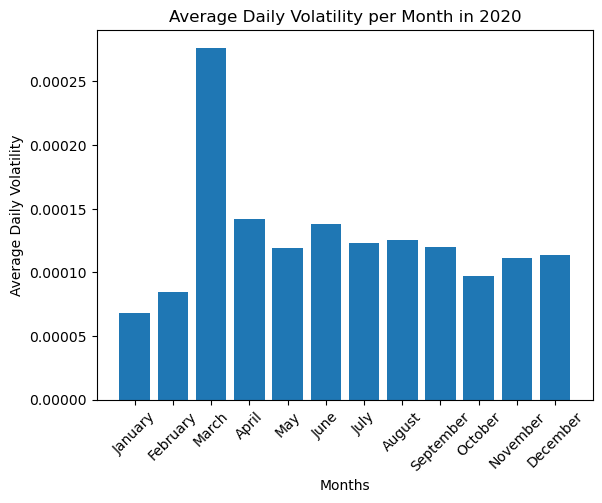

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
data = pd.read_csv("../Downloaded Database/E2U(MinuteData2020).csv", header=None,
                   names=['date', 'time', 'open', 'high', 'low', 'close', 'volume'])

# Combine date and time columns and convert to datetime
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data.set_index('datetime', inplace=True)

# Calculate logarithmic returns
data['log_returns'] = np.log(data['close'] / data['close'].shift(1))

# Resample daily and calculate daily volatility
daily_volatility = data['log_returns'].resample('D').std()

# Resample monthly and calculate average monthly volatility
monthly_volatility = daily_volatility.resample('M').mean()

# Plot the data
plt.bar(monthly_volatility.index.strftime('%B'), monthly_volatility.values)
plt.xlabel('Months')
plt.ylabel('Average Daily Volatility')
plt.title('Average Daily Volatility per Month in 2020')
plt.xticks(rotation=45)
plt.show()

Between 01/02/1990 and 11/20/2023
Enter Start Date in format "MM/DD/YYYY":
01/01/2019


Between 01/02/1990 and 11/20/2023
Enter End Date in format "MM/DD/YYYY":
01/01/2022




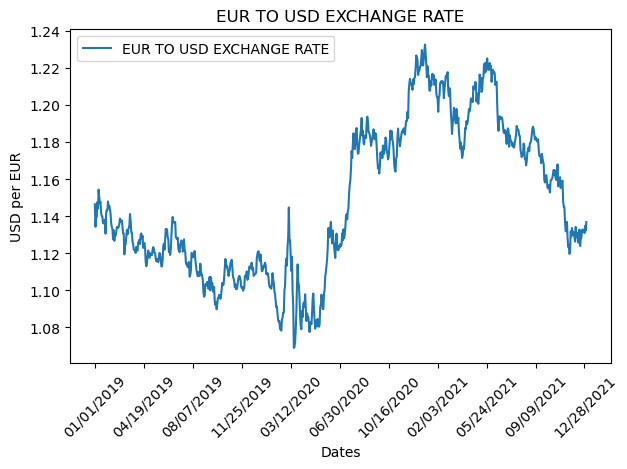

In [5]:
import matplotlib.pyplot as plt
import csv
import re
from datetime import datetime, timedelta

def dateValidation(date_str):
    '''
    Function that takes in a string and int. It checks if the date string is in proper format or not

    Parameters: date1_str string and dayMonth int

    Return: bool T or F
    '''
    pattern = re.compile(r'^\d{2}/\d{2}/\d{4}$')
    
    if not bool(pattern.match(date_str)):
        return False
    
    try:
        date_obj = datetime.strptime(date_str, '%m/%d/%Y')
        lower_bound = datetime(1990, 1, 2)
        upper_bound = datetime(2023, 11, 20)
        return lower_bound <= date_obj <= upper_bound
    except ValueError:
        return False  # Invalid date

rate = []
date = []
startDate = ""
endDate = ""

# OPEN csv file and write to csv_reader
with open(f'../Downloaded Database/eur_to_usd.csv','r') as fileCSV:
    if(csv.reader(fileCSV)):
        csv_reader = csv.reader(fileCSV)
    else:
        raise Exception("Unable to read file")
    
    # Skip headers
    next(csv_reader)
    #split the data into dates and floats
    for row in csv_reader:
        date.append(row[0])
        rate.append(float(row[1]))

    fileCSV.close()

# REVERSE
rate = rate[::-1]
date = date[::-1]


# USER INPUT FOR START AND END DATE
while(not dateValidation(startDate)):
    print("Between 01/02/1990 and 11/20/2023")
    print('Enter Start Date in format "MM/DD/YYYY":')
    startDate = input()
    print("\n")
while(not dateValidation(endDate)):
    print("Between 01/02/1990 and 11/20/2023")
    print('Enter End Date in format "MM/DD/YYYY":')
    endDate = input()
    print("\n")

# Turn input into date and time object to sort
start_datetime = datetime.strptime(startDate, '%m/%d/%Y')
end_datetime = datetime.strptime(endDate, '%m/%d/%Y')

filtered_rate = []
filtered_date = []

#SORT THE VALUES
for d, r in zip(date, rate):
    date_obj = datetime.strptime(d, '%m/%d/%Y')
    if start_datetime <= date_obj <= end_datetime:
        filtered_date.append(d)
        filtered_rate.append(r)

rate = filtered_rate
date = filtered_date

#Plot code
fig, ax = plt.subplots()

dataLabel = 'EUR TO USD EXCHANGE RATE'

ax.plot(date, rate, label=dataLabel, marker='')

num_ticks = 10

if(len(date) > num_ticks):
    step = len(date) // num_ticks

    date_labels = date[::step]

    ax.set_xticks(date_labels)

plt.xticks(rotation=45)

ax.set_xlabel('Dates')
ax.set_ylabel('USD per EUR')
ax.set_title(dataLabel)

ax.legend()

plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

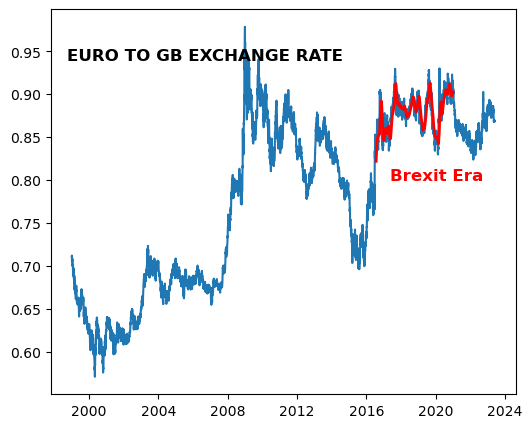

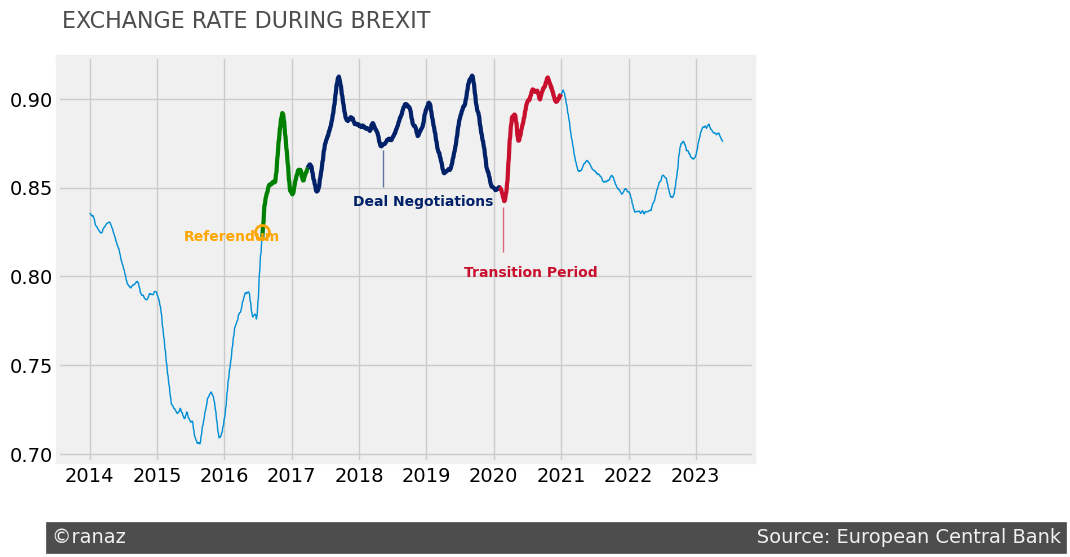

In [1]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt


import matplotlib.style as style 

exchange_rates = pd.read_csv('../Downloaded Database/Eur_to_GB.csv')

exchange_rates.head()
exchange_rates.info()
exchange_rates.rename(columns={'[UK pound sterling ]': 'GB_Pounds', 'Period\\Unit:': 'Time'}, inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
euro_gbpounds = exchange_rates[['Time','GB_Pounds']]
euro_gbpounds.head()
euro_gbpounds['GB_Pounds'].value_counts()
euro_gbpounds = euro_gbpounds[euro_gbpounds['GB_Pounds'] != '-']
euro_gbpounds['GB_Pounds'] = euro_gbpounds['GB_Pounds'].astype(float)
euro_gbpounds.info()

fig, bx = plt.subplots(figsize=(6,5))

euro_gbpounds['rolling_mean'] = euro_gbpounds['GB_Pounds'].rolling(30).mean()
brexit = euro_gbpounds.copy()[(euro_gbpounds['Time'].dt.year >= 2014)]

brexit_starts = datetime.datetime(2016, 7, 23)
brexit_end = datetime.datetime(2020, 12, 31)
brexit_period = euro_gbpounds[(euro_gbpounds['Time'] >= brexit_starts) & (euro_gbpounds['Time'] <= brexit_end)]

bx.text(10500, .94, 'EURO TO GB EXCHANGE RATE',weight='bold', size=12, color='black')
plt.plot(euro_gbpounds['Time'],
         euro_gbpounds['GB_Pounds'])
bx.plot(brexit_period['Time'], brexit_period['rolling_mean'], linewidth=2, color='red')

bx.text(17300, 0.80, 'Brexit Era', color='red', weight='bold', size=12)
plt.show()


referendum_starts = datetime.datetime(2016, 7, 23)
referendum_end = datetime.datetime(2017, 3, 29)
refeendum_period = brexit[(brexit['Time'] >= referendum_starts) & (brexit['Time'] <= referendum_end)]

referendum = brexit[brexit['Time'] >= referendum_starts]

negotiation_start = datetime.datetime(2017, 3, 29)
negotiation_end = datetime.datetime(2020, 1, 31)
deal_negotiation = brexit[(brexit['Time'] >= negotiation_start) & (brexit['Time'] <= negotiation_end)]


transition_start = datetime.datetime(2020, 1, 31)
transition_end = datetime.datetime(2020, 12, 31)
transition_period = brexit[(brexit['Time'] >= transition_start) & (brexit['Time'] <= transition_end)]



style.use('fivethirtyeight')


fig, ax = plt.subplots(figsize=(8,5), facecolor='white')

ax.plot(brexit['Time'], brexit['rolling_mean'], linewidth=1)

ax.plot(refeendum_period['Time'], refeendum_period['rolling_mean'], linewidth=3, color='green')

ax.plot(deal_negotiation['Time'], deal_negotiation['rolling_mean'], linewidth=3, color='#012169')

ax.plot(transition_period['Time'], transition_period['rolling_mean'], linewidth=3, color='#C8102E')

# Title and a subtitle 

ax.text(15920, .94, 'EXCHANGE RATE DURING BREXIT', size=16, color='#4d4d4d')

# Adding events: Referendum, Deal Negotiation and Transition Period
ax.plot(referendum.iloc[0][0], referendum.iloc[2][2], 'o', ms=10, mfc='none', mew=2, mec='#ffa500')
ax.text(16580, 0.82, 'Referendum', color='#ffa500', weight='bold', size=10)

ax.axvline(17660, c='#012169', alpha=0.6, linewidth=1,ymin=0.77, ymax=0.68)
ax.text(17500, 0.84, 'Deal Negotiations', color='#012169', weight='bold', size=10)

ax.axvline(18310, c='#C8102E', alpha=0.6, linewidth=1,ymin=0.63, ymax=0.52)
ax.text(18100, 0.80, 'Transition Period', color='#C8102E', weight='bold', size=10)

### Adding a signature
ax.text(15865, 0.65, '©ranaz' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)


plt.show()


In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime

import plotly.express as px


# In[2]:


#Reading the data(csv file)
exchange_rates_df = pd.read_csv('../Downloaded Database/euro-daily-hist_1999_2022.csv')
exchange_rates_df.info()


# In[3]:


#The reason why the dtype of some of the columns is 'object' is because there's '-' at some places, which is a string

exchange_rates_df.loc[exchange_rates_df['[Swiss franc ]'] == '-']


# In[4]:


# setting Period\Unit as the index

exchange_rates_df.rename(columns = {'[Swiss franc ]': 'CHF', 'Period\\Unit:' : 'Time'}, inplace = True)
exchange_rates_df['Time'] = pd.to_datetime(exchange_rates_df['Time'])
exchange_rates_df.sort_values('Time', inplace = True)
exchange_rates_df.reset_index(drop = True, inplace = True)

exchange_rates_df.set_index(['Time'], inplace=True)
exchange_rates_df.head()


# In[5]:


#Replace '-'s and interpret the numbers as floats

exchange_rates_df = exchange_rates_df.replace('-', np.nan).astype(float)
exchange_rates_df.head()


# In[6]:


px.line(exchange_rates_df)


# ## Slide 1 plot - EUR-CHF Exchange Rate

# In[7]:


import plotly.graph_objects as go


# In[8]:


#Setting the colors and thresholds for the graph
segment_colors = {
    1: '#219C90',
    2: '#E9B824',
    3: '#D83F31',
    4: '#EE9322'
}

date_threshold_zero = '1990-10-01'
date_threshold_one = '2007-10-01'
date_threshold_two = '2011-08-10'
date_threshold_three = '2015-01-23'
date_threshold_four = '2027-10-01'

segment_names = {
    1: 'The Beginning',
    2: 'Financial Crisis',
    3: 'SNB Peg',
    4: 'Recent Times'
}

line_width=2

plot_title = "EUR/CHF exchange rates"
xaxis_title = "Date"
yaxis_title = "Exchange Rate"


# In[9]:


# Initialization
slide_one_plot = go.Figure()


# Segment one - The Beginning
mask = (exchange_rates_df.index >= date_threshold_zero) & (exchange_rates_df.index < date_threshold_one)
slide_one_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=segment_names[1],
        line=dict(color=segment_colors[1], width=line_width)
    )
)


#Segment two - Global Financial Crisis
mask = (exchange_rates_df.index >= date_threshold_one) & (exchange_rates_df.index < date_threshold_two)
slide_one_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=segment_names[2],
        line=dict(color=segment_colors[2], width=line_width)
    )
)

#Segment three - SNB Peg
mask = (exchange_rates_df.index >= date_threshold_two) & (exchange_rates_df.index < date_threshold_three)
slide_one_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=segment_names[3],
        line=dict(color=segment_colors[3], width=line_width)
    )
)

#Segment four - Recent times
mask = (exchange_rates_df.index >= date_threshold_three) & (exchange_rates_df.index < date_threshold_four)
slide_one_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=segment_names[4],
        line=dict(color=segment_colors[4], width=line_width)
    )
)

#Adding titles and annotations
slide_one_plot.update_layout(
    title=plot_title,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title,
    legend_title="EUR-CHF exchange rates",
    font=dict(
        # family="Courier New, monospace",
        size=14,
        color="#000000"
    )
)

slide_one_plot.add_annotation(
    x='2002-08-01',
    y=1.59,
    text="The Beginning",
    showarrow=False,
    yshift=10,
    textangle=0,
)

slide_one_plot.add_annotation(
    x='2008-10-30',
    y=1.6803,
    text="The Peak(EUR-CHF peaks in 2007)",
    showarrow=False,
    yshift=10,
    textangle=0,
)

slide_one_plot.add_annotation(
    x='2009-03-01',
    y=1.31,
    text="Global",
    showarrow=False,
    yshift=10,
    textangle=0,
)

slide_one_plot.add_annotation(
    x='2009-03-01',
    y=1.27,
    text="Financial",
    showarrow=False,
    yshift=10,
    textangle=0,
)

slide_one_plot.add_annotation(
    x='2009-03-01',
    y=1.23,
    text="Crisis",
    showarrow=False,
    yshift=10,
    textangle=0,
)

slide_one_plot.add_annotation(
    x='2013-05-01',
    y=1.24,
    text="SNB Peg",
    showarrow=False,
    yshift=10,
    textangle=0,
)

slide_one_plot.add_annotation(
    x='2018-07-01',
    y=1,
    text="Recent Times",
    showarrow=False,
    yshift=10,
    textangle=0,
)

slide_one_plot.add_vline(x='2007-09-28', line_width=1, line_dash="dash", line_color="grey")
slide_one_plot.add_vline(x='2011-08-11', line_width=1, line_dash="dash", line_color="grey")
slide_one_plot.add_vline(x='2015-01-23', line_width=1, line_dash="dash", line_color="grey")


slide_one_plot.show()


# ## Slide 2 - plot 1

# In[10]:


#Setting the colors and threshold for the graph for Segment One - The Beginning
plot_one_segment_colors = {
    1: '#435334',
    2: segment_colors[1],
    3: '#004225',
    4: segment_colors[1]
}

plot_one_date_threshold_zero = date_threshold_zero
plot_one_date_threshold_one = '2000-03-20'
plot_one_date_threshold_two = '2003-03-05'
plot_one_date_threshold_three = '2004-03-08'
plot_one_date_threshold_four = date_threshold_one

plot_one_segment_names = {
    1: 'Pegged at 1.6',
    2: '2002-2003',
    3: 'Euro Strengthening',
    4: '2003-2007'
}

line_width=1.5
line_width_bold = 2

plot_one_title = "The beginning"
xaxis_title = "Date"
yaxis_title = "Exchange Rate"


# In[11]:


#Initialization
slide_two_plot = go.Figure()


# Subsegment one - Pegged at 1.6
mask = (exchange_rates_df.index >= plot_one_date_threshold_zero) & (exchange_rates_df.index < plot_one_date_threshold_one)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_one_segment_names[1],
        line=dict(color=plot_one_segment_colors[1], width=line_width_bold)
    )
)

# Subsegment two - 2002-2003
mask = (exchange_rates_df.index >= plot_one_date_threshold_one) & (exchange_rates_df.index < plot_one_date_threshold_two)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_one_segment_names[2],
        line=dict(color=plot_one_segment_colors[2], width=line_width)
    )
)

# Subsegment three - Euro Strengthening
mask = (exchange_rates_df.index >= plot_one_date_threshold_two) & (exchange_rates_df.index < plot_one_date_threshold_three)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_one_segment_names[3],
        line=dict(color=plot_one_segment_colors[3], width=line_width_bold)
    )
)

# Subsegment four - 2003-2007
mask = (exchange_rates_df.index >= plot_one_date_threshold_three) & (exchange_rates_df.index < plot_one_date_threshold_four)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_one_segment_names[4],
        line=dict(color=plot_one_segment_colors[4], width=line_width)
    )
)

#Adding annotations 
slide_two_plot.add_annotation(
    x='1999-09-01',
    y=1.64,
    text="Pegged at 1.6",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='1999-09-01',
    y=1.62,
    text="1Euro = 1.6CHF",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2003-10-01',
    y=1.6,
    text="Euro",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2003-10-01',
    y=1.59,
    text="Strengthening",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.update_layout(
    title=plot_one_title,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title,
    legend_title="The Beginning",
    font=dict(
        # family="Courier New, monospace",
        size=14,
        color="#000000"
    )
)

slide_two_plot.add_vline(x='2000-03-20', line_width=1, line_dash="dash", line_color="grey")
slide_two_plot.add_vline(x='2003-03-05', line_width=1, line_dash="dash", line_color="grey")
slide_two_plot.add_vline(x='2004-03-08', line_width=1, line_dash="dash", line_color="grey")

slide_two_plot.show()


# ## Slide 2 - Part 3

# In[12]:


#Setting colors and threshold for the graph Segment Two - Gloabal Financial Crisis
plot_two_segment_colors = {
    1: segment_colors[2],
    2: '#CC3636',
    3: segment_colors[2],
    4: '#9C254D',
}

plot_two_date_threshold_zero = date_threshold_one
plot_two_date_threshold_one = '2008-09-22'
plot_two_date_threshold_two = '2008-10-27'
plot_two_date_threshold_three = '2011-03-11'
plot_two_date_threshold_four = date_threshold_two

plot_two_segment_names = {
    1: '2007-2008',
    2: 'Global Financial Crisis',
    3: '2008-2011',
    4: 'Eurozone debt crisis'
}

line_width=2
line_width_bold=3

plot_two_title = "Financial Crisis"
xaxis_title = "Date"
yaxis_title = "Exchange Rate"


# In[13]:


# Initialization
slide_two_plot = go.Figure()


# Subsegment one - 2007-2008
mask = (exchange_rates_df.index >= plot_two_date_threshold_zero) & (exchange_rates_df.index < plot_two_date_threshold_one)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_two_segment_names[1],
        line=dict(color=plot_two_segment_colors[1], width=line_width)
    )
)

# Subsegment two - Global Financial Crisis
mask = (exchange_rates_df.index >= plot_two_date_threshold_one) & (exchange_rates_df.index < plot_two_date_threshold_two)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_two_segment_names[2],
        line=dict(color=plot_two_segment_colors[2], width=3),
        mode='lines'
    ),
)

# Subsegment three - 2008-2011
mask = (exchange_rates_df.index >= plot_two_date_threshold_two) & (exchange_rates_df.index < plot_two_date_threshold_three)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_two_segment_names[3],
        line=dict(color=plot_two_segment_colors[3], width=line_width)
    )
)

# Subsegment four - Eurozone Debt Crisis
mask = (exchange_rates_df.index >= plot_two_date_threshold_three) & (exchange_rates_df.index < plot_two_date_threshold_four)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_two_segment_names[4],
        line=dict(color=plot_two_segment_colors[4], width=3)
    )
)

#Adding annotations 
slide_two_plot.add_annotation(
    x='2008-10-27',
    y=1.4,
    text="Global",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2008-10-27',
    y=1.37,
    text="Financial",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2008-10-27',
    y=1.34,
    text="Crisis",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2011-05-31',
    y=1.4,
    text="Eurozone",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
    
)

slide_two_plot.add_annotation(
    x='2011-05-31',
    y=1.37,
    text="Debt",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2011-05-31',
    y=1.34,
    text="Crisis",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.update_layout(
    title=plot_two_title,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title,
    legend_title="Financial Crisis",
    font=dict(
        # family="Courier New, monospace",
        size=14,
        color="#000000"
    )
)

slide_two_plot.add_vline(x='2008-09-22', line_width=1, line_dash="dash", line_color="grey")
slide_two_plot.add_vline(x='2008-10-27', line_width=1, line_dash="dash", line_color="grey")
slide_two_plot.add_vline(x='2011-03-11', line_width=1, line_dash="dash", line_color="grey")


slide_two_plot.show()


# ## Slide 2 - plot 3

# In[14]:


#Adding colors and threshold for the graph - Segment Three - SNB Peg
plot_three_segment_colors = {
    1: '#A9A9A9',
    2: segment_colors[3],
    3: '#A9A9A9',
    4: segment_colors[3],
}

plot_three_date_threshold_zero = date_threshold_two
plot_three_date_threshold_one = '2012-04-05'
plot_three_date_threshold_two = '2012-09-05'
plot_three_date_threshold_three = '2014-12-17'
plot_three_date_threshold_four = date_threshold_three

plot_three_segment_names = {
    1: 'Euro rises',
    2: 'Pegged at 1.2',
    3: '2012-2014',
    4: 'Flash Crash'
}

line_width=2
line_width_bold=3.5

plot_three_title = "SNB Peg"
xaxis_title = "Date"
yaxis_title = "Spot exchange rate"


# In[15]:


# Initialization
slide_two_plot = go.Figure()


# Subsegment one - Euro rises
mask = (exchange_rates_df.index >= plot_three_date_threshold_zero) & (exchange_rates_df.index < plot_three_date_threshold_one)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_three_segment_names[1],
        line=dict(color=plot_three_segment_colors[1], width=line_width)
    )
)

# Subsegment two - Pegged at 1.2
mask = (exchange_rates_df.index >= plot_three_date_threshold_one) & (exchange_rates_df.index < plot_three_date_threshold_two)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_three_segment_names[2],
        line=dict(color=plot_three_segment_colors[2], width=line_width_bold),
        mode='lines'
    ),
)

# Subsegment three - 2012 -2014(Value stable at 1.2)
mask = (exchange_rates_df.index >= plot_three_date_threshold_two) & (exchange_rates_df.index < plot_three_date_threshold_three)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_three_segment_names[3],
        line=dict(color=plot_three_segment_colors[3], width=line_width)
    )
)

# Subsegment four - Flash Crash
mask = (exchange_rates_df.index >= plot_three_date_threshold_three) & (exchange_rates_df.index < plot_three_date_threshold_four)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_three_segment_names[4],
        line=dict(color=plot_three_segment_colors[4], width=line_width_bold),
        mode='lines'
    )
)

#Adding annotations
slide_two_plot.add_annotation(
    x='2012-05-31',
    y=1.17,
    text="Peg mantained at 1.2",
    showarrow=False,
    yshift=10,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2014-10-01',
    y=1.1,
    text="Flash Crash",
    showarrow=False,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2014-07-01',
    y=1.07,
    text="Value of Euro drops by 20%",
    showarrow=False,
    textangle=0,
    font=dict(size=12)
)


slide_two_plot.update_layout(
    title=plot_three_title,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title,
    legend_title="SNB Peg",
    font=dict(
        size=14,
        color="#000000"
    )
)

slide_two_plot.add_vline(x='2012-04-10', line_width=1, line_dash="dash", line_color="grey")
slide_two_plot.add_vline(x='2012-09-05', line_width=1, line_dash="dash", line_color="grey")
slide_two_plot.add_vline(x='2014-12-17', line_width=1, line_dash="dash", line_color="grey")

slide_two_plot.show()


# ## Slide 2 - plot 4

# In[16]:


#Setting colors and thresholds for Segment four graph - Recent times
plot_four_segment_colors = {
    1: segment_colors[4],
    2: '#9A4444',
    3: segment_colors[4],
    4: '#9C254D',
}

plot_four_date_threshold_zero = date_threshold_three
plot_four_date_threshold_one = '2017-04-21'
plot_four_date_threshold_two = '2018-01-23'
plot_four_date_threshold_three = '2022-06-09'
plot_four_date_threshold_four = date_threshold_four

plot_four_segment_names = {
    1: '2015-2017',
    2: 'Euro rising (2017)',
    3: '2018-2022',
    4: 'Euro downfall (2022)'
}

line_width=2
line_width_bold=3

plot_four_title = "Recent Times"
xaxis_title = "Date"
yaxis_title = "Exchange rate"


# In[17]:


# Initialization
slide_two_plot = go.Figure()


# Subsegment one - 2015-2017
mask = (exchange_rates_df.index >= plot_four_date_threshold_zero) & (exchange_rates_df.index < plot_four_date_threshold_one)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_four_segment_names[1],
        line=dict(color=plot_four_segment_colors[1], width=line_width)
    )
)

# Subsegment two - Euro rising(2017)
mask = (exchange_rates_df.index >= plot_four_date_threshold_one) & (exchange_rates_df.index < plot_four_date_threshold_two)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_four_segment_names[2],
        line=dict(color=plot_four_segment_colors[2], width=line_width_bold),
        mode='lines'
    ),
)

# Subsegment three - (2018-2022)
mask = (exchange_rates_df.index >= plot_four_date_threshold_two) & (exchange_rates_df.index < plot_four_date_threshold_three)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_four_segment_names[3],
        line=dict(color=plot_four_segment_colors[3], width=line_width)
    )
)

# Subsegment four - Euro downfall
mask = (exchange_rates_df.index >= plot_four_date_threshold_three) & (exchange_rates_df.index < plot_four_date_threshold_four)
slide_two_plot.add_trace(
    go.Scatter(
        x=exchange_rates_df[mask].index,
        y=exchange_rates_df.loc[mask, 'CHF'],
        name=plot_four_segment_names[4],
        line=dict(color=plot_four_segment_colors[4], width=line_width_bold),
        mode='lines'
    )
)


slide_two_plot.update_layout(
    title=plot_four_title,
    xaxis_title=xaxis_title,
    yaxis_title=yaxis_title,
    legend_title="Recent times",
    font=dict(
        # family="Courier New, monospace",
        size=14,
        color="#000000"
    )
)

slide_two_plot.add_annotation(
    x='2023-01-01',
    y=1.05,
    text="Euro",
    showarrow=False,
    textangle=1.05,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2023-01-01',
    y=1.03,
    text="Downfall",
    showarrow=False,
    textangle=1.05,
    font=dict(size=12)
)

slide_two_plot.add_annotation(
    x='2017-10-01',
    y=1.05,
    text="Euro rising again",
    showarrow=False,
    textangle=0,
    font=dict(size=12)
)

slide_two_plot.add_vline(x='2017-04-21', line_width=1, line_dash="dash", line_color="grey")
slide_two_plot.add_vline(x='2018-01-23', line_width=1, line_dash="dash", line_color="grey")
slide_two_plot.add_vline(x='2022-06-09', line_width=1, line_dash="dash", line_color="grey")

slide_two_plot.show()


# In[18]:


exchange_rates_df.std().sort_values()


# In[19]:


exchange_rates_df.corr()[['CHF']]


# In[20]:


exchange_rates_df.info(max_cols=100)


# In[21]:


exchange_rates_df


# In[22]:


def get_cagr(rates: pd.Series):
    '''
        Function that calculates the compund Annual Growth rate of currencies
        CAGR = (Ending date / Beginning date) ** (1/number of years)
        
        Parameters:
        Input: rates (float)
        Returns: CAGR
    '''
    
    initial_date = rates.first_valid_index()
    final_date = rates.last_valid_index()
    num_years = (final_date - initial_date) / datetime.timedelta(days=365)

    initial_value = rates.loc[initial_date]
    final_value = rates.loc[final_date]
    # print(f"Initial date, final date, number of years, initial, final value: {initial_date}, {final_date}, {num_years}, {initial_value}, {final_value}.")

    return ((initial_value / final_value) ** (1 / num_years))


# In[23]:


# testing the aboove function
get_cagr(rates=exchange_rates_df['[Australian dollar ]'])


# In[24]:


cagr_df = pd.DataFrame(index=exchange_rates_df.columns)

for country in cagr_df.index:
    cagr_df.loc[country, 'CAGR'] = get_cagr(rates=exchange_rates_df[country])

cagr_df.head()


# In[25]:


# adding a column that shows which country the exchange rate refers to

cagr_df['Country'] = [
    'Australia', 'Bulgaria', 'Brazil', 'Canada', 'Switzerland', 'China', 'Cyprus', 'Czech Republic', 'Denmark',
    'Estonia', 'United Kingdom', 'Greece', 'Hong Kong', 'Croatia', 'Hungary', 'Indonesia', 'Israel', 'India', 'Iceland',
    'Japan', 'Korea', 'Lithuania', 'Lativa', 'Malta', 'Mexico', 'Malaysia', 'Norway', 'New Zealand', 'Philippines', 'Poland',
    'Romania', 'Russia', 'Sweden', 'Singapore', 'Slovenia', 'Slovak Republic', 'Thailand', 'Turkey', 'United States', 'South Africa'
]

cagr_df.head()


# In[26]:


# this dataframe now has 3-letter codes for most of the countries that we want
df = px.data.gapminder().query("year==2007")

# get the 3-letter code
cagr_df = pd.merge(
    df[['iso_alpha', 'country']],
    cagr_df,
    left_on='country',
    right_on='Country',
    how='right'
)

cagr_df


# In[27]:


# there are some countries for which we don't have the 3-letter code
cagr_df.loc[cagr_df['iso_alpha'].isna(), :]


# In[28]:


cagr_df.loc[cagr_df['Country']=='Cyprus', 'iso_alpha'] = 'CYP'
cagr_df.loc[cagr_df['Country']=='Estonia', 'iso_alpha'] = 'EST'
cagr_df.loc[cagr_df['Country']=='Hong Kong', 'iso_alpha'] = 'HKG'
cagr_df.loc[cagr_df['Country']=='Korea', 'iso_alpha'] = 'KOR'
cagr_df.loc[cagr_df['Country']=='Lithuania', 'iso_alpha'] = 'LTU'
cagr_df.loc[cagr_df['Country']=='Lativa', 'iso_alpha'] = 'LVA'
cagr_df.loc[cagr_df['Country']=='Malta', 'iso_alpha'] = 'MLT'
cagr_df.loc[cagr_df['Country']=='Russia', 'iso_alpha'] = 'RUS'

cagr_df.loc[cagr_df['iso_alpha'].isna(), :]


# In[29]:


cagr_df['iso_alpha'].isna().sum()


# In[30]:


fig = px.choropleth(
    cagr_df,
    locations="iso_alpha",
    color="CAGR", 
    hover_name="Country",
    hover_data=['Country', 'CAGR'],
    color_continuous_scale=px.colors.diverging.delta
)


fig.update_layout(
    title="Compound Annual Growth Rate (CAGR) of various currencies w.r.t. Euro",
    geo=dict(showframe=False, showcoastlines=False)
)


# In[31]:


#Checking the best 3 and worst 3 performers
cagr_df.sort_values(by = 'CAGR')


# In[ ]:





# In[ ]:






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6311 entries, 1999-01-04 to 2023-05-26
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   [Australian dollar ]      6249 non-null   float64
 1   [Bulgarian lev ]          5851 non-null   float64
 2   [Brazilian real ]         5982 non-null   float64
 3   [Canadian dollar ]        6249 non-null   float64
 4   CHF                       6249 non-null   float64
 5   [Chinese yuan renminbi ]  5982 non-null   float64
 6   [Cypriot pound ]          2304 non-null   float64
 7   [Czech koruna ]           6249 non-null   float64
 8   [Danish krone ]           6249 non-null   float64
 9   [Estonian kroon ]         3074 non-null   float64
 10  [UK pound sterling ]      6249 non-null   float64
 11  [Greek drachma ]          514 non-null    float64
 12  [Hong Kong dollar ]       6249 non-null   float64
 13  [Croatian kuna ]          5880 non-null   flo

iso_alpha          country      CAGR          Country
37       TUR           Turkey  0.846825           Turkey
31       RUS              NaN  0.935954           Russia
30       ROU          Romania  0.946963          Romania
39       ZAF     South Africa  0.955595     South Africa
2        BRA           Brazil  0.955789           Brazil
34       SVN         Slovenia  0.970752         Slovenia
17       IND            India  0.971089            India
18       ISL          Iceland  0.975438          Iceland
15       IDN        Indonesia  0.978371        Indonesia
11       GRC           Greece  0.979703           Greece
24       MEX           Mexico  0.979993           Mexico
14       HUN          Hungary  0.984128          Hungary
26       NOR           Norway  0.988230           Norway
28       PHL      Philippines  0.988731      Philippines
10       GBR   United Kingdom  0.991858   United Kingdom
32       SWE           Sweden  0.991973           Sweden
19       JPN            Japan  0.995241            Japan
29       POL           Poland  0.995586           Poland
25       MYS         Malaysia  0.995948         Malaysia
22       LVA              NaN  0.996501           Lativa
20       KOR              NaN  0.999221            Korea
6        CYP              NaN  0.999436           Cyprus
1        BGR         Bulgaria  0.999801         Bulgaria
9        EST              NaN  1.000000          Estonia
8        DNK          Denmark  1.000007          Denmark
13       HRV          Croatia  1.001160          Croatia
16       ISR           Israel  1.002244           Israel
12       HKG              NaN  1.003322        Hong Kong
23       MLT              NaN  1.003549            Malta
38       USA    United States  1.003784    United States
5        CHN            China  1.004897            China
36       THA         Thailand  1.005577         Thailand
0        AUS        Australia  1.006166        Australia
3        CAN           Canada  1.008539           Canada
27       NZL      New Zealand  1.009482      New Zealand
33       SGP        Singapore  1.012271        Singapore
7        CZE   Czech Republic  1.016322   Czech Republic
21       LTU              NaN  1.019691        Lithuania
4        CHE      Switzerland  1.021125      Switzerland
35       SVK  Slovak Republic  1.036210  Slovak Republic

Features
1. Top 10 / Bottom 10 trends against EUR from 2000 to 2023 (talk about EUR in this)
2. a. USA - EUR view - Presidents
   b. USA -> Trend against EUR - add political events at dip and highs
3. Anomaly --> Country doing well (from other perspectives) but its curremncy getting weaker => INDIA


Justifications: https://www.kaggle.com/datasets/mathurinache/world-happiness-report?select=2015.csv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 49 to 6248
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6200 non-null   datetime64[ns]
 1   euro_to_usd   6200 non-null   float64       
 2   rolling_mean  6200 non-null   float64       
 3   usd_to_eur    6200 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 242.2 KB


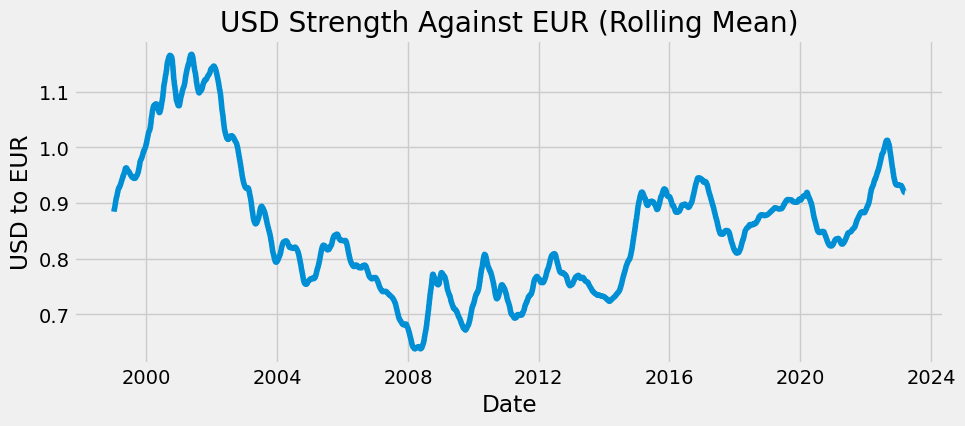

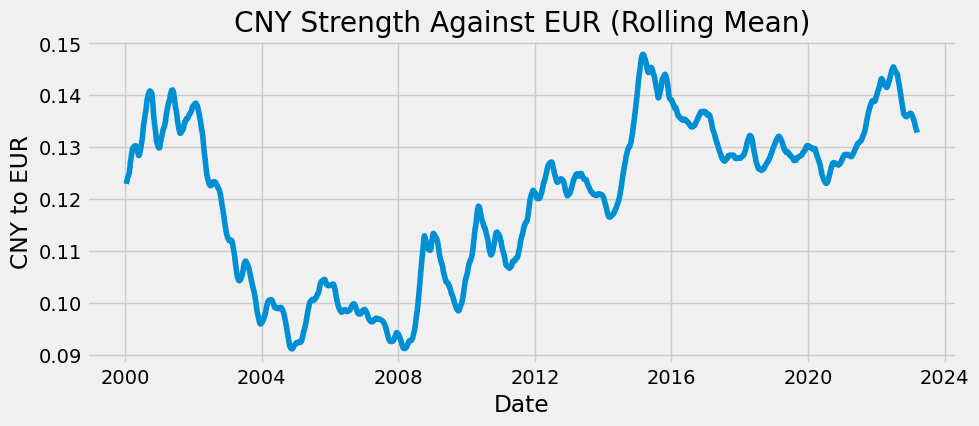

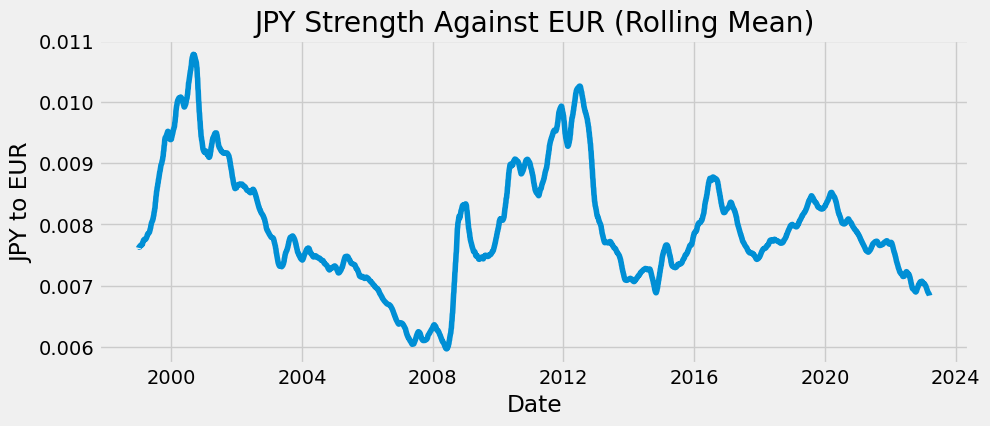

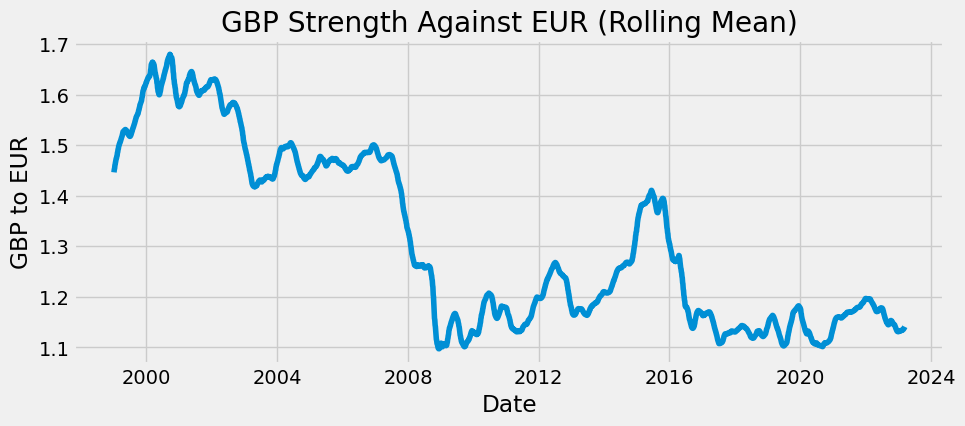

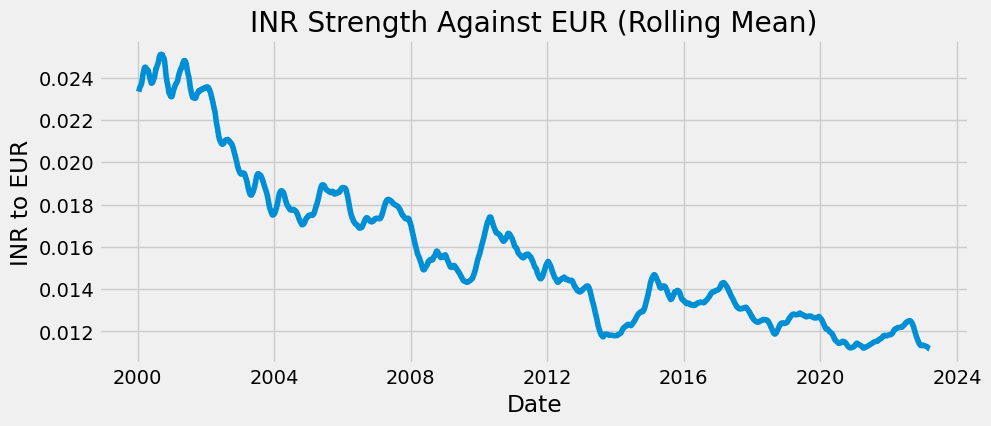

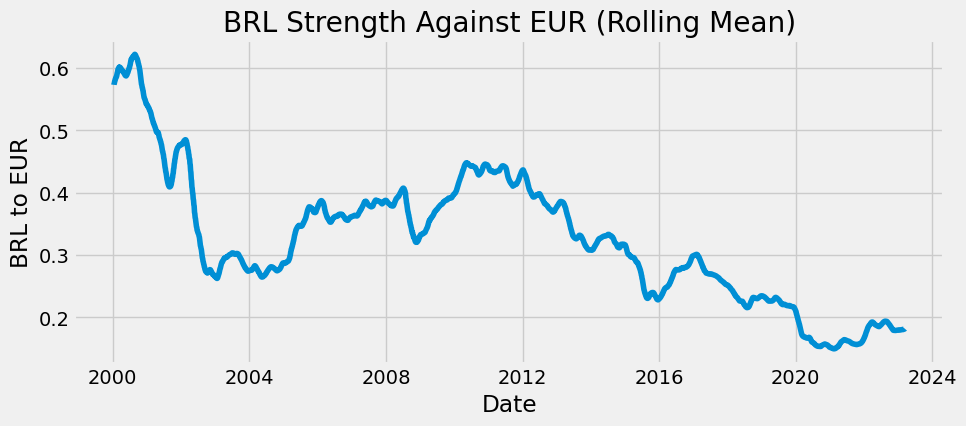

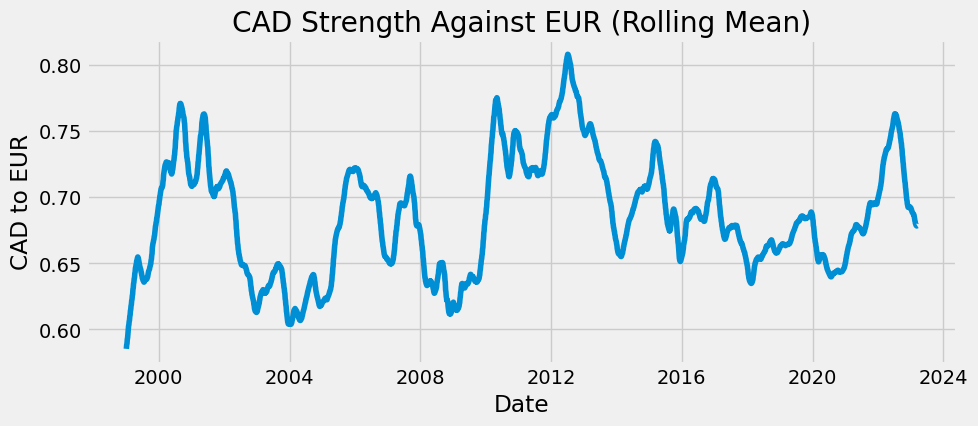

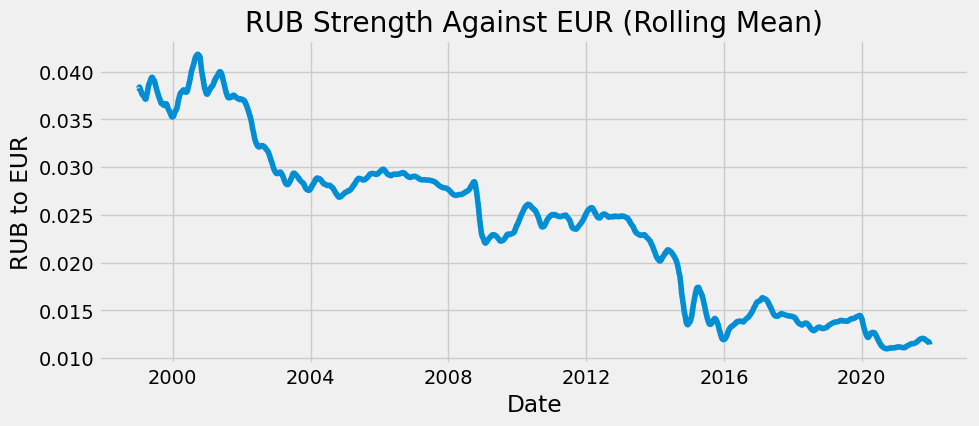

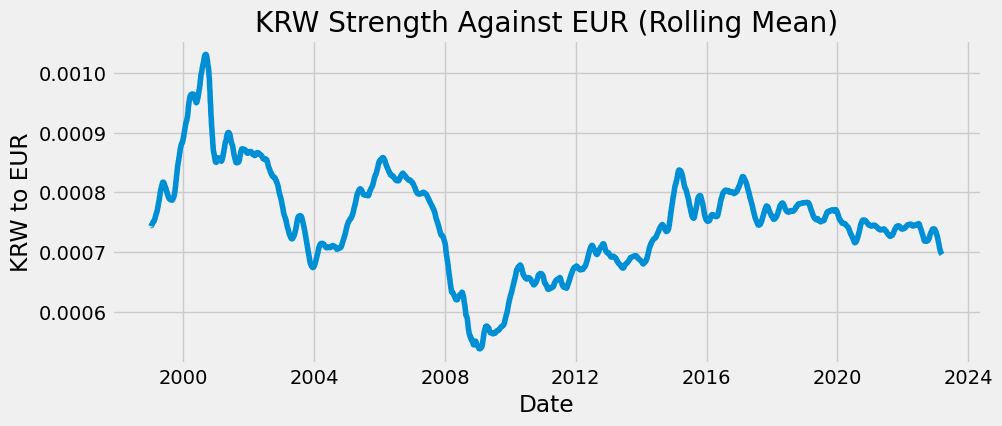

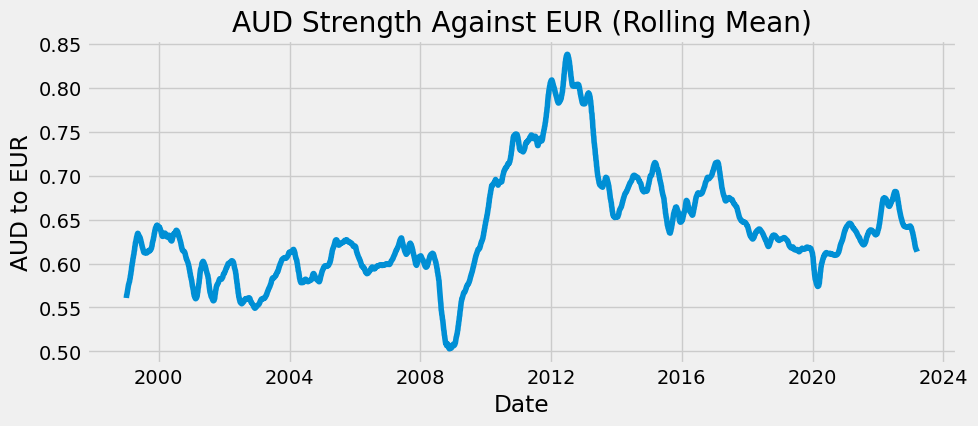

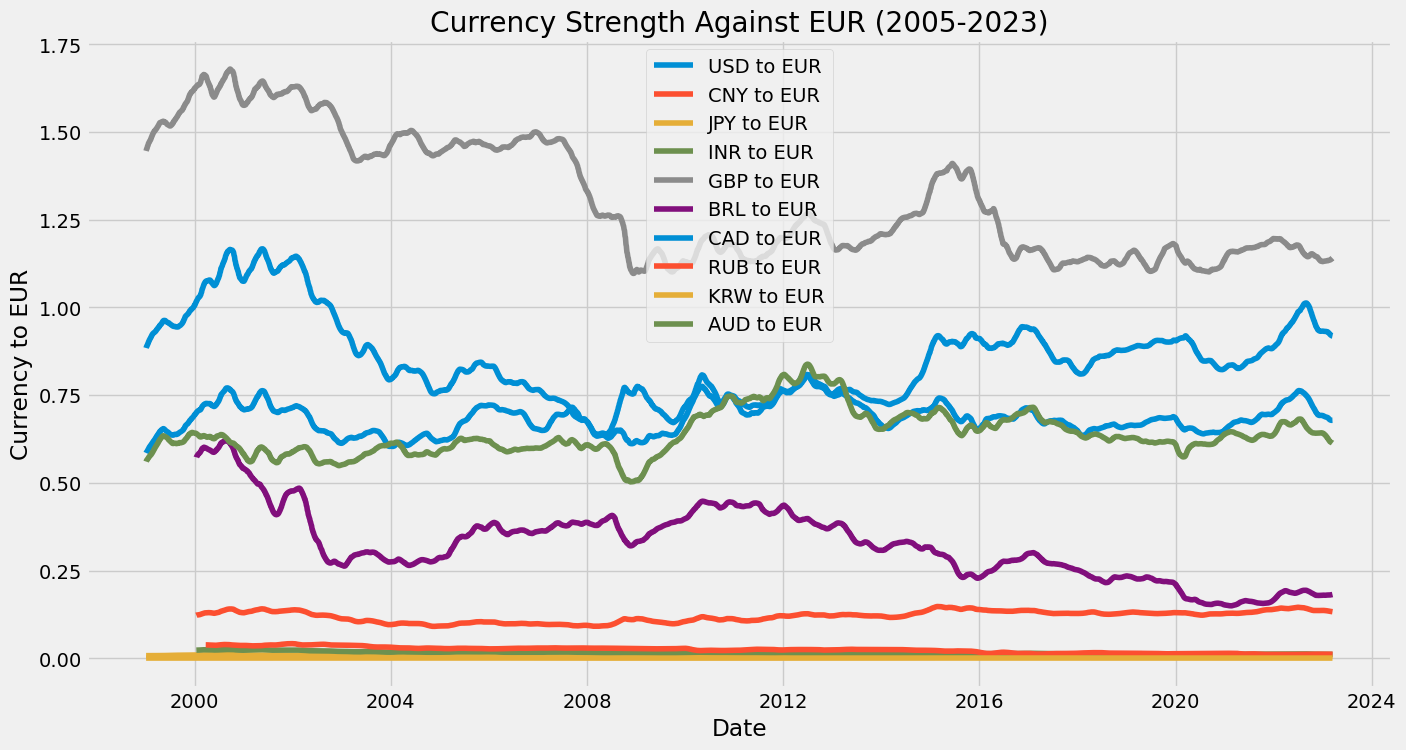

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# Loading the provided dataset again
file_path = '../Downloaded Database/euro-daily-hist_1999_2022.csv'
rates = pd.read_csv(file_path)


"""USA"""
# Renaming the relevant columns for the United States (US Dollar)
rates = rates.rename(columns={'[US dollar ]': "euro_to_usd"})

# Selecting and cleaning the data for US Dollar
euro_to_usd = rates[["Period\\Unit:", "euro_to_usd"]].copy()
euro_to_usd = euro_to_usd.rename(columns={'Period\\Unit:': 'date'})
euro_to_usd['date'] = pd.to_datetime(euro_to_usd['date'])
euro_to_usd["euro_to_usd"] = pd.to_numeric(euro_to_usd['euro_to_usd'], errors='coerce')
euro_to_usd = euro_to_usd.dropna(subset=['euro_to_usd'])
euro_to_usd = euro_to_usd.reset_index(drop=True)

# Adding a rolling mean column
euro_to_usd['rolling_mean'] = euro_to_usd['euro_to_usd'].rolling(50).mean()
euro_to_usd = euro_to_usd.dropna(subset=['rolling_mean'])

# Calculating the strength of the US Dollar against the Euro
euro_to_usd['usd_to_eur'] = 1/euro_to_usd['rolling_mean']

# Display basic info and plot
euro_to_usd.info()
plt.figure(figsize=(10, 4))
plt.plot(euro_to_usd['date'], euro_to_usd['usd_to_eur'])
plt.title('USD Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('USD to EUR')
plt.show()



"""CHINA"""


# Renaming the relevant columns for China (Chinese Yuan Renminbi)
rates = rates.rename(columns={'[Chinese yuan renminbi ]': "euro_to_cny"})

# Selecting and cleaning the data for Chinese Yuan
euro_to_cny = rates[["Period\\Unit:", "euro_to_cny"]].copy()
euro_to_cny = euro_to_cny.rename(columns={'Period\\Unit:': 'date'})
euro_to_cny['date'] = pd.to_datetime(euro_to_cny['date'])
euro_to_cny["euro_to_cny"] = pd.to_numeric(euro_to_cny['euro_to_cny'], errors='coerce')
euro_to_cny = euro_to_cny.dropna(subset=['euro_to_cny'])
euro_to_cny = euro_to_cny.reset_index(drop=True)

# Adding a rolling mean column for Chinese Yuan
euro_to_cny['rolling_mean'] = euro_to_cny['euro_to_cny'].rolling(50).mean()
euro_to_cny = euro_to_cny.dropna(subset=['rolling_mean'])

# Calculating the strength of the Chinese Yuan against the Euro
euro_to_cny['cny_to_eur'] = 1/euro_to_cny['rolling_mean']

# Plotting the strength of the Chinese Yuan against the Euro
plt.figure(figsize=(10, 4))
plt.plot(euro_to_cny['date'], euro_to_cny['cny_to_eur'])
plt.title('CNY Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('CNY to EUR')
plt.show()

"""JAPAN"""

# Renaming the relevant columns for Japan (Japanese Yen)
rates = rates.rename(columns={'[Japanese yen ]': "euro_to_jpy"})

# Selecting and cleaning the data for Japanese Yen
euro_to_jpy = rates[["Period\\Unit:", "euro_to_jpy"]].copy()
euro_to_jpy = euro_to_jpy.rename(columns={'Period\\Unit:': 'date'})
euro_to_jpy['date'] = pd.to_datetime(euro_to_jpy['date'])
euro_to_jpy["euro_to_jpy"] = pd.to_numeric(euro_to_jpy['euro_to_jpy'], errors='coerce')
euro_to_jpy = euro_to_jpy.dropna(subset=['euro_to_jpy'])
euro_to_jpy = euro_to_jpy.reset_index(drop=True)

# Adding a rolling mean column for Japanese Yen
euro_to_jpy['rolling_mean'] = euro_to_jpy['euro_to_jpy'].rolling(50).mean()
euro_to_jpy = euro_to_jpy.dropna(subset=['rolling_mean'])

# Calculating the strength of the Japanese Yen against the Euro
euro_to_jpy['jpy_to_eur'] = 1/euro_to_jpy['rolling_mean']

# Plotting the strength of the Japanese Yen against the Euro
plt.figure(figsize=(10, 4))
plt.plot(euro_to_jpy['date'], euro_to_jpy['jpy_to_eur'])
plt.title('JPY Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('JPY to EUR')
plt.show()


"""UNITED KINGDOM"""

# Renaming the relevant columns for the United Kingdom (Pound Sterling)
rates = rates.rename(columns={'[UK pound sterling ]': "euro_to_gbp"})

# Selecting and cleaning the data for Pound Sterling
euro_to_gbp = rates[["Period\\Unit:", "euro_to_gbp"]].copy()
euro_to_gbp = euro_to_gbp.rename(columns={'Period\\Unit:': 'date'})
euro_to_gbp['date'] = pd.to_datetime(euro_to_gbp['date'])
euro_to_gbp["euro_to_gbp"] = pd.to_numeric(euro_to_gbp['euro_to_gbp'], errors='coerce')
euro_to_gbp = euro_to_gbp.dropna(subset=['euro_to_gbp'])
euro_to_gbp = euro_to_gbp.reset_index(drop=True)

# Adding a rolling mean column for Pound Sterling
euro_to_gbp['rolling_mean'] = euro_to_gbp['euro_to_gbp'].rolling(50).mean()
euro_to_gbp = euro_to_gbp.dropna(subset=['rolling_mean'])

# Calculating the strength of the Pound Sterling against the Euro
euro_to_gbp['gbp_to_eur'] = 1/euro_to_gbp['rolling_mean']

# Plotting the strength of the Pound Sterling against the Euro
plt.figure(figsize=(10, 4))
plt.plot(euro_to_gbp['date'], euro_to_gbp['gbp_to_eur'])
plt.title('GBP Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('GBP to EUR')
plt.show()


"""INDIA"""

# Renaming the relevant columns for India (Indian Rupee)
rates = rates.rename(columns={'[Indian rupee ]': "euro_to_inr"})

# Selecting and cleaning the data for Indian Rupee
euro_to_inr = rates[["Period\\Unit:", "euro_to_inr"]].copy()
euro_to_inr = euro_to_inr.rename(columns={'Period\\Unit:': 'date'})
euro_to_inr['date'] = pd.to_datetime(euro_to_inr['date'])
euro_to_inr["euro_to_inr"] = pd.to_numeric(euro_to_inr['euro_to_inr'], errors='coerce')
euro_to_inr = euro_to_inr.dropna(subset=['euro_to_inr'])
euro_to_inr = euro_to_inr.reset_index(drop=True)

# Adding a rolling mean column for Indian Rupee
euro_to_inr['rolling_mean'] = euro_to_inr['euro_to_inr'].rolling(50).mean()
euro_to_inr = euro_to_inr.dropna(subset=['rolling_mean'])

# Calculating the strength of the Indian Rupee against the Euro
euro_to_inr['inr_to_eur'] = 1/euro_to_inr['rolling_mean']

# Plotting the strength of the Indian Rupee against the Euro
plt.figure(figsize=(10, 4))
plt.plot(euro_to_inr['date'], euro_to_inr['inr_to_eur'])
plt.title('INR Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('INR to EUR')
plt.show()


"""BRAZIL"""

# Renaming the relevant columns for Brazil (Brazilian Real)
rates = rates.rename(columns={'[Brazilian real ]': "euro_to_brl"})

# Selecting and cleaning the data for Brazilian Real
euro_to_brl = rates[["Period\\Unit:", "euro_to_brl"]].copy()
euro_to_brl = euro_to_brl.rename(columns={'Period\\Unit:': 'date'})
euro_to_brl['date'] = pd.to_datetime(euro_to_brl['date'])
euro_to_brl["euro_to_brl"] = pd.to_numeric(euro_to_brl['euro_to_brl'], errors='coerce')
euro_to_brl = euro_to_brl.dropna(subset=['euro_to_brl'])
euro_to_brl = euro_to_brl.reset_index(drop=True)

# Adding a rolling mean column for Brazilian Real
euro_to_brl['rolling_mean'] = euro_to_brl['euro_to_brl'].rolling(50).mean()
euro_to_brl = euro_to_brl.dropna(subset=['rolling_mean'])

# Calculating the strength of the Brazilian Real against the Euro
euro_to_brl['brl_to_eur'] = 1/euro_to_brl['rolling_mean']

# Plotting the strength of the Brazilian Real against the Euro
plt.figure(figsize=(10, 4))
plt.plot(euro_to_brl['date'], euro_to_brl['brl_to_eur'])
plt.title('BRL Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('BRL to EUR')
plt.show()


"""CANADA"""
# Renaming the relevant columns for Canada (Canadian Dollar)
rates = rates.rename(columns={'[Canadian dollar ]': "euro_to_cad"})

# Selecting and cleaning the data for Canadian Dollar
euro_to_cad = rates[["Period\\Unit:", "euro_to_cad"]].copy()
euro_to_cad = euro_to_cad.rename(columns={'Period\\Unit:': 'date'})
euro_to_cad['date'] = pd.to_datetime(euro_to_cad['date'])
euro_to_cad["euro_to_cad"] = pd.to_numeric(euro_to_cad['euro_to_cad'], errors='coerce')
euro_to_cad = euro_to_cad.dropna(subset=['euro_to_cad'])
euro_to_cad = euro_to_cad.reset_index(drop=True)

# Adding a rolling mean column for Canadian Dollar
euro_to_cad['rolling_mean'] = euro_to_cad['euro_to_cad'].rolling(50).mean()
euro_to_cad = euro_to_cad.dropna(subset=['rolling_mean'])

# Calculating the strength of the Canadian Dollar against the Euro
euro_to_cad['cad_to_eur'] = 1/euro_to_cad['rolling_mean']

# Plotting the strength of the Canadian Dollar against the Euro
plt.figure(figsize=(10, 4))
plt.plot(euro_to_cad['date'], euro_to_cad['cad_to_eur'])
plt.title('CAD Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('CAD to EUR')
plt.show()


"""RUSSIA"""
# Renaming the relevant columns for Russia (Russian Rouble)
rates = rates.rename(columns={'[Russian rouble ]': "euro_to_rub"})

# Selecting and cleaning the data for Russian Rouble
euro_to_rub = rates[["Period\\Unit:", "euro_to_rub"]].copy()
euro_to_rub = euro_to_rub.rename(columns={'Period\\Unit:': 'date'})
euro_to_rub['date'] = pd.to_datetime(euro_to_rub['date'])
euro_to_rub["euro_to_rub"] = pd.to_numeric(euro_to_rub['euro_to_rub'], errors='coerce')
euro_to_rub = euro_to_rub.dropna(subset=['euro_to_rub'])
euro_to_rub = euro_to_rub.reset_index(drop=True)

# Adding a rolling mean column for Russian Rouble
euro_to_rub['rolling_mean'] = euro_to_rub['euro_to_rub'].rolling(50).mean()
euro_to_rub = euro_to_rub.dropna(subset=['rolling_mean'])

# Calculating the strength of the Russian Rouble against the Euro
euro_to_rub['rub_to_eur'] = 1/euro_to_rub['rolling_mean']

# Plotting the strength of the Russian Rouble against the Euro
plt.figure(figsize=(10, 4))
plt.plot(euro_to_rub['date'], euro_to_rub['rub_to_eur'])
plt.title('RUB Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('RUB to EUR')
plt.show()

"""SOUTH KOREA"""
# Renaming the relevant columns for South Korea (Korean Won)
rates = rates.rename(columns={'[Korean won ]': "euro_to_krw"})

# Selecting and cleaning the data for Korean Won
euro_to_krw = rates[["Period\\Unit:", "euro_to_krw"]].copy()
euro_to_krw = euro_to_krw.rename(columns={'Period\\Unit:': 'date'})
euro_to_krw['date'] = pd.to_datetime(euro_to_krw['date'])
euro_to_krw["euro_to_krw"] = pd.to_numeric(euro_to_krw['euro_to_krw'], errors='coerce')
euro_to_krw = euro_to_krw.dropna(subset=['euro_to_krw'])
euro_to_krw = euro_to_krw.reset_index(drop=True)

# Adding a rolling mean column for Korean Won
euro_to_krw['rolling_mean'] = euro_to_krw['euro_to_krw'].rolling(50).mean()
euro_to_krw = euro_to_krw.dropna(subset=['rolling_mean'])

# Calculating the strength of the Korean Won against the Euro
euro_to_krw['krw_to_eur'] = 1/euro_to_krw['rolling_mean']

# Plotting the strength of the Korean Won against the Euro
plt.figure(figsize=(10, 4))
plt.plot(euro_to_krw['date'], euro_to_krw['krw_to_eur'])
plt.title('KRW Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('KRW to EUR')
plt.show()


"""AUSTRALIA"""
# Renaming the relevant columns for Australia (Australian Dollar)
rates = rates.rename(columns={'[Australian dollar ]': "euro_to_aud"})

# Selecting and cleaning the data for Australian Dollar
euro_to_aud = rates[["Period\\Unit:", "euro_to_aud"]].copy()
euro_to_aud = euro_to_aud.rename(columns={'Period\\Unit:': 'date'})
euro_to_aud['date'] = pd.to_datetime(euro_to_aud['date'])
euro_to_aud["euro_to_aud"] = pd.to_numeric(euro_to_aud['euro_to_aud'], errors='coerce')
euro_to_aud = euro_to_aud.dropna(subset=['euro_to_aud'])
euro_to_aud = euro_to_aud.reset_index(drop=True)

# Adding a rolling mean column for Australian Dollar
euro_to_aud['rolling_mean'] = euro_to_aud['euro_to_aud'].rolling(50).mean()
euro_to_aud = euro_to_aud.dropna(subset=['rolling_mean'])

# Calculating the strength of the Australian Dollar against the Euro
euro_to_aud['aud_to_eur'] = 1/euro_to_aud['rolling_mean']

# Plotting the strength of the Australian Dollar against the Euro
plt.figure(figsize=(10, 4))
plt.plot(euro_to_aud['date'], euro_to_aud['aud_to_eur'])
plt.title('AUD Strength Against EUR (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('AUD to EUR')
plt.show()



"""Combined Plot"""

# Combining the currency strength data for all the mentioned countries
combined_data = pd.DataFrame({
    'Date': euro_to_usd['date'],
    'USD to EUR': euro_to_usd['usd_to_eur'],
    'CNY to EUR': euro_to_cny['cny_to_eur'],
    'JPY to EUR': euro_to_jpy['jpy_to_eur'],
    'INR to EUR': euro_to_inr['inr_to_eur'],
    'GBP to EUR': euro_to_gbp['gbp_to_eur'],
    'BRL to EUR': euro_to_brl['brl_to_eur'],
    'CAD to EUR': euro_to_cad['cad_to_eur'],
    'RUB to EUR': euro_to_rub['rub_to_eur'],
    'KRW to EUR': euro_to_krw['krw_to_eur'],
    'AUD to EUR': euro_to_aud['aud_to_eur']
})

# Plotting the combined data
plt.figure(figsize=(15, 8))
for currency in combined_data.columns[1:]:
    plt.plot(combined_data['Date'], combined_data[currency], label=currency)

plt.title('Currency Strength Against EUR (2005-2023)')
plt.xlabel('Date')
plt.ylabel('Currency to EUR')
plt.legend()
plt.show()
